# Описание проекта:
Работа с интернет-магазином «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# I. Откроем файл и посмотрим на общую информацию.
<a name="1zag"></a>

In [ ]:
# импортирую необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median
import scipy.stats as stats
import matplotlib.ticker as ticker



In [ ]:
# загружу данные
data = pd.read_csv('NDA link')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# исследую данные и проверю наличие пропусков
display(data.describe());

data.info();

display(data.isna().sum());

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Почти половина пропусков в оценках пользователей  и критиков. Нужно изменить тип данных в столбцах с годом релиза,float там выглядит странно. И пользовательская оценка с рейтингом - тип данных object, выглядит странно.

# II. Подготовлю данные.
<a name="2zag"></a>

In [ ]:
# приведу столбцы к нижнему регистру
data.columns = data.columns.str.lower() 
print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Обработаю пропуски.

In [ ]:
# столбец name,там 2 пропуска - удалим их
print(data.isna().sum());
print()
data = data[~data['name'].isna()]

print(data.isna().sum());

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


Пропусков немного, поэтому можно удалить. Так же исчезло два пропуска в столбце с жанром - хорошо.

Приведу тип данных в некоторых столбцах в порядок

Пропусков в столбце: 269
Пропусков после удаления: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


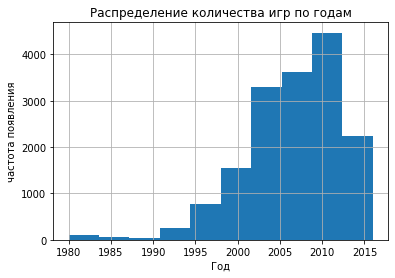

In [ ]:
# столбец year_of_release
print('Пропусков в столбце:',data['year_of_release'].isna().sum())
#удалю пропуски
data = data.dropna(subset =['year_of_release'])
print('Пропусков после удаления:',data['year_of_release'].isna().sum())
print()
data['year_of_release'] = data['year_of_release'].astype('int');
# удостоверюсь,что тип данных действительно изменился
data.info();

plot = data['year_of_release'].hist();
plot.set_xlabel('Год')
plot.set_ylabel('частота появления')
plot.set_title('Распределение количества игр по годам')
plt.show()

Удалил пропуски,т.к их мало и при дальнейшем анализе они буду смещать картину с суммой продаж по годам,распределению жанров и т.д. Больше всего данных по 2010 +-3 годам 

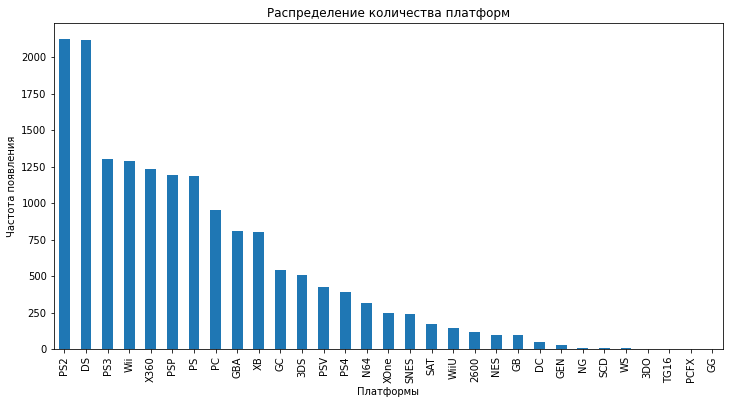

In [ ]:
# исследую столбец platform

plot = data['platform'].value_counts().plot(kind = 'bar',figsize = (12,6));
plot.set_xlabel('Платформы')
plot.set_ylabel('Частота появления')
plot.set_title('Распределение количества платформ')
plt.show()

Всё выглядит хорошо

In [ ]:
# исследую столбец critic_score
print(data['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


Здесь пропуски заполнить не получится. Можно попробовать дополнить пропуски из оценки пользователей,но это исказит данные, т.к оценки критиков и пользователей чаще всего разнятся

In [ ]:
# исследую столбец user_score
print(data['user_score'].unique())
print()
print('tbd count:',data[data['user_score'] == 'tbd']['user_score'].count())
print()

data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')
data.info();


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
tbd count: 2376

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 n

tbd - to be decided or to be determined: used when something has not yet been decided or is not yet known. (from cambridge dictionary). Оценка, которой на данный момент нет. Таких в датасете 2376.  Если Мы оцениваем игры за 2016 год,возможно она вышла совсем недавно и еще не спало эмбарго на пользовательские обзоры. В остальных случаях пропуски можно объяснить либо более поздним запуском платформы для сбора оценок чем выход игры,либо игра очень непопулярна,либо данные были утеряны из-за какой-то ошибки\события. Т.к информация о tbd для нас не особо информативна - nan и tbd перезаписал на аномальное значение,которое далее будут отфильтровывать.

In [ ]:
# исследую столбец rating
print(data['rating'].unique())
print('Пропусков :',data['rating'].isna().sum())
display(data[data['rating'].isna()].head(40))
# индикатор пропусков
data['rating'] = data['rating'].fillna('no_rating')

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Пропусков : 6676


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Видно,что без рейтинга у нас разные игры - как и тетрис,так и call of duty,поэтому поставить всем играм какую-то одну оценку нельзя. Если предположить,что можно составить рейтинг исходя из жанра - где,например,пазл можно поставить детский рейтинг,а шутерам 18+,то снова рискуем совершить ошибку: известная Duck Hunt тоже шутер,но многие из нас в нее играли в детстве :) а ту же call of duty ребенку не позволительно запускать. Поэтому оставим рейтинг в таком виде,какой он есть,с пропусками сдесь ничего не сделаешь. Так же видно,что в списке присутствует одна игра,но на разных платформах. Если есть пропуски на одной из платформ,но нет в других,то заполнить такие пропуски средним с других платформ будет неверным: например,из свежего - состояние cyberpunk 2077 на ps4 и xbox series x. На одной платформе игру вовсе удалят из магазина до исправления ее состояния,а на другой в нее спокойно можно будет поиграть.

# III. Исследовательский анализ данных
<a name="3zag"></a>

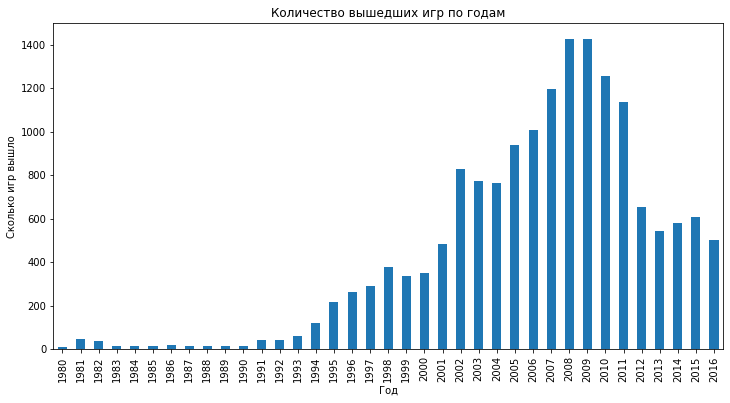

In [ ]:
# Исследую сколько игр вышло в разные годы. 

from pandas.core.indexes.extension import Index
plot = data.groupby(['year_of_release'])['name'].count().plot(
     y='year_of_release', kind='bar', figsize = (12,6)
);
plot.set_xlabel('Год')
plot.set_ylabel('Cколько игр вышло')
plot.set_title('Количество вышедших игр по годам')
plt.show()


До 2000 года выходило мало игр по сравнению с последующими годами. После 2009 пошел резкий спад в количестве выхода новых игр. 

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


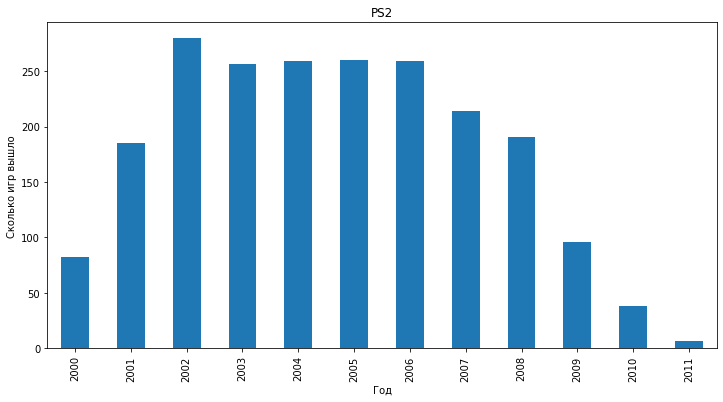

Количество лет активной жизни платформы: 11 



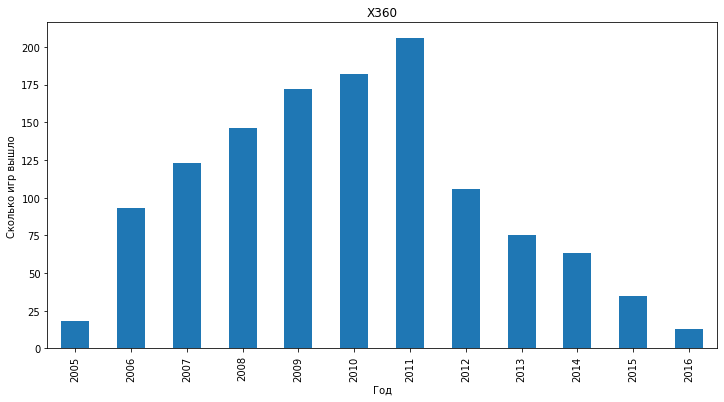

Количество лет активной жизни платформы: 10 



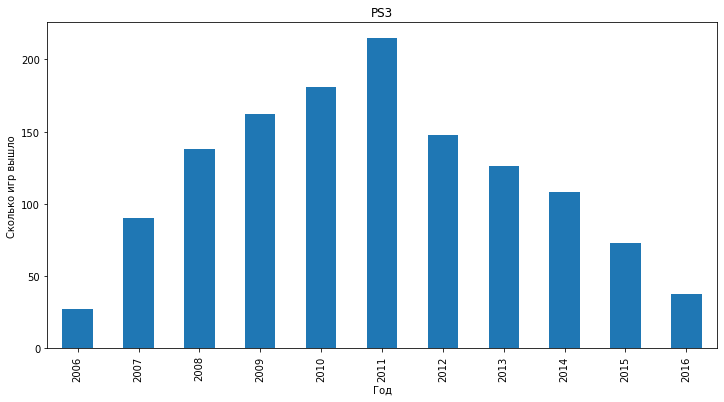

Количество лет активной жизни платформы: 11 



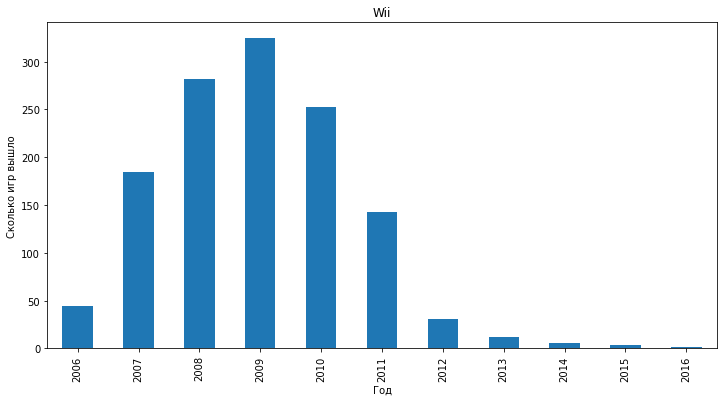

Количество лет активной жизни платформы: 7 



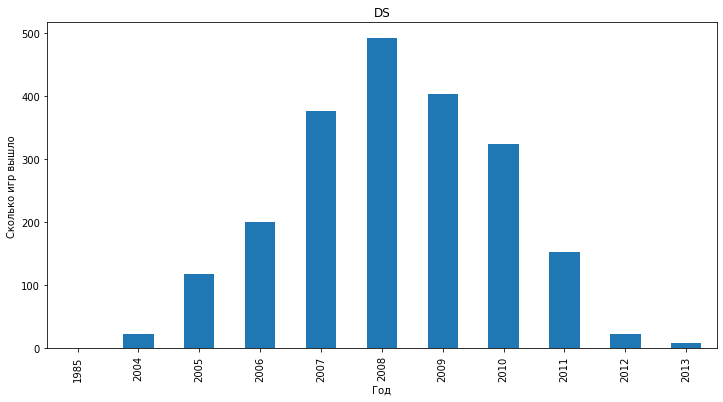

Количество лет активной жизни платформы: 7 



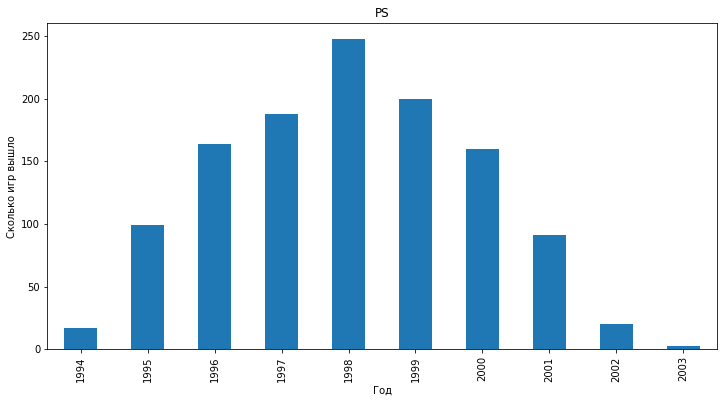

Количество лет активной жизни платформы: 7 



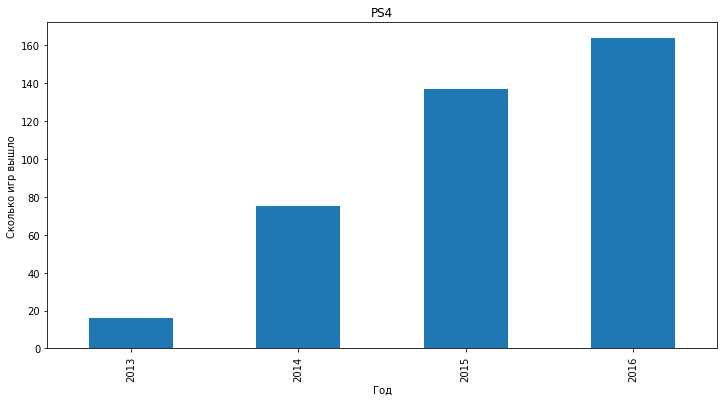

Количество лет активной жизни платформы: 3 



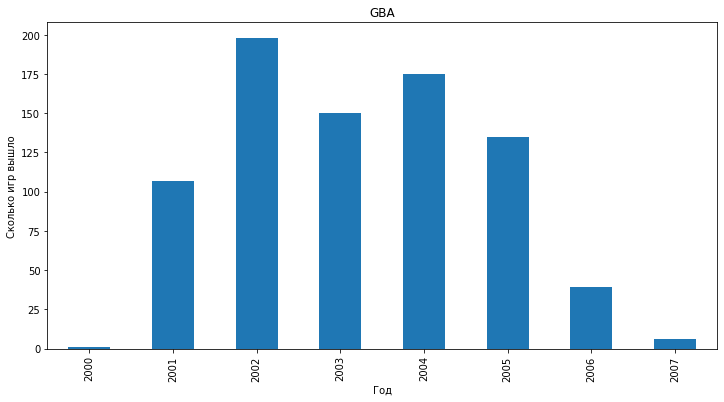

Количество лет активной жизни платформы: 6 



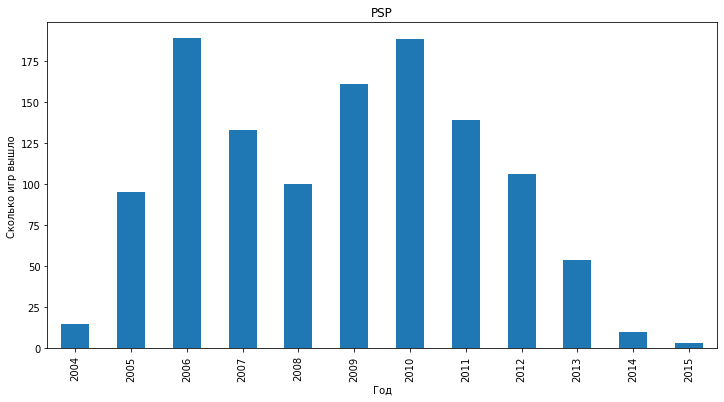

Количество лет активной жизни платформы: 9 



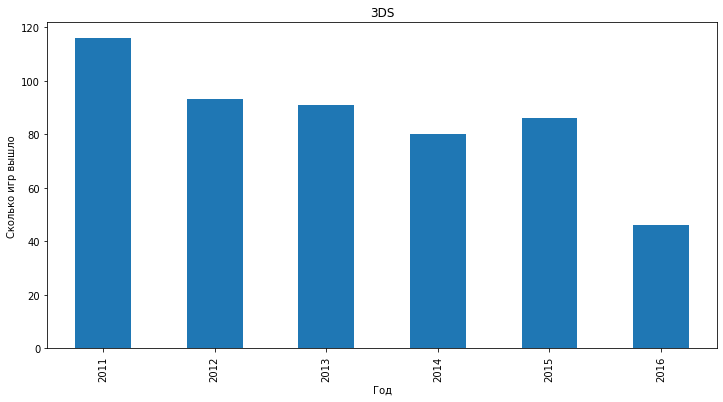

Количество лет активной жизни платформы: 6 

В среднем платформа актуальна 7.0 лет


In [ ]:
# продажи по платформам
# выделим топ платформ
top_platform = data.pivot_table(index = 'platform',values = 'total_sales',aggfunc=('sum')).sort_values(
    by='total_sales',ascending = False).head(10)
display(top_platform)
# построим сколько игр вышло на конкретной самой популярной платформе.
# возьму как показатель "жизни" платформы - сколько игр на нее вышло.
life_period = []
for platform in top_platform.index:
    values = data[data['platform']==platform].groupby('year_of_release')['name'].count()
    plot = data[data['platform']==platform].groupby('year_of_release')['name'].count().plot(
          x=Index, y='name', kind='bar', figsize = (12,6))
    plot.set_xlabel('Год')
    plot.set_ylabel('Cколько игр вышло')
    plot.set_title(platform)
    plt.show()
  
    # если вышло <50 новых игр в год,считаю,что платформа исчерпала себя
    print('Количество лет активной жизни платформы:',(values>25).sum(),'\n')
    life_period.append((values>25).sum())
print(f'В среднем платформа актуальна {median(life_period)} лет')

Характерный срок жизни платформы - 7 лет.

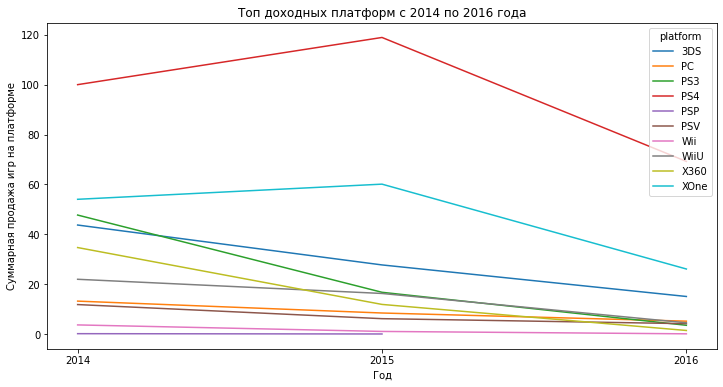

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [ ]:
# возьму последние актуальные данные - с 2014 года включительно.
# так в срез попадут только актуальные платформы и данные
good_data = data[data['year_of_release'] >= 2014]
plot = good_data.pivot_table(
    index= 'year_of_release',
    values = 'total_sales',
    columns = 'platform',
    aggfunc='sum').plot(figsize = (12,6));
plot.set_xlabel('Год')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Топ доходных платформ с 2014 по 2016 года')
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

print('\n')

display(data[data['year_of_release'] >= 2014].pivot_table(
    index= 'year_of_release',values = 'total_sales',columns = 'platform', aggfunc='sum'))

Перспективные платформы: PS4,XOne,3DS,PC. В целом весь рынок показывает снижение продаж и выхода новых игр на платформы.

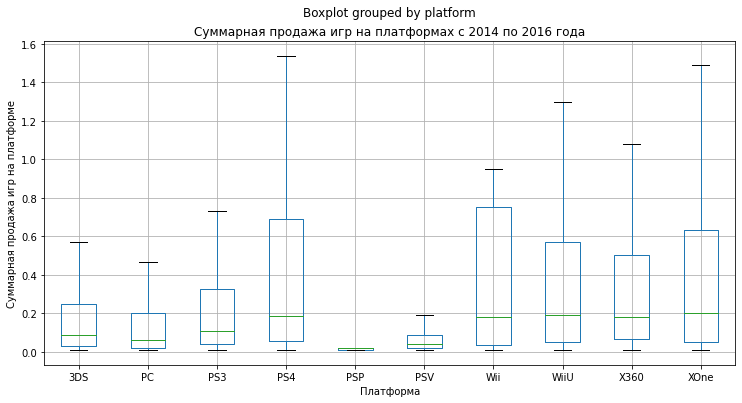

In [ ]:
#нахождение платформ-лидеров по продажам. 
plot = good_data[['platform','total_sales']].boxplot( by = 'platform',figsize=(12,6),showfliers=False);
plot.set_xlabel('Платформа')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Суммарная продажа игр на платформах с 2014 по 2016 года')
plt.show();

Самые крупные платформы - ps4,Xone,3ds. Так же есть потенциал у платформ предыдущего поколения - X360,PS3. Но медиана у них находится ниже среднего значения,так что эти платформы увядают,что логично,т.к вышло новое поколение этих консолей.  

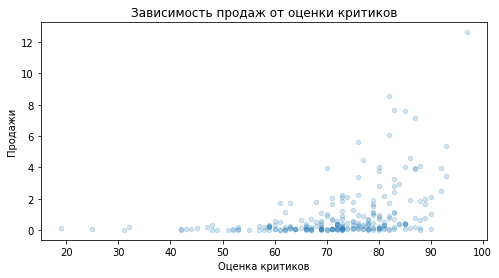

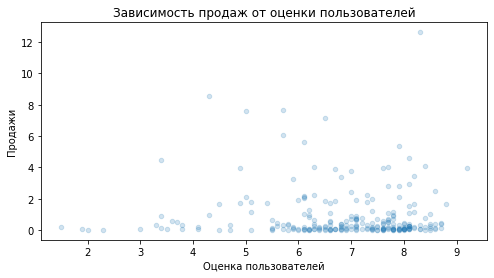

,total_sales,user_score,critic_score
total_sales,1.000000,-0.040132,0.402661
user_score,-0.040132,1.000000,0.546434
critic_score,0.402661,0.546434,1.000000


In [ ]:
# исследую зависимость отзывов пользователей и критиков на продажи для PS4
ps4_data = good_data[good_data['platform'] == 'PS4']
#^ взял самую популярную платформу ps4
plot = ps4_data.plot(x='critic_score', y='total_sales', kind='scatter',alpha = 0.2,figsize=(8,4))
plot.set_xlabel('Оценка критиков')
plot.set_ylabel('Продажи')
plot.set_title('Зависимость продаж от оценки критиков')
plt.show()

print('\n')
# теперь для отзывов пользователей
plot = ps4_data.plot(x='user_score', y='total_sales', kind='scatter',alpha = 0.2,figsize=(8,4))
plot.set_xlabel('Оценка пользователей')
plot.set_ylabel('Продажи')
plot.set_title('Зависимость продаж от оценки пользователей')
plt.show() 

ps4_data[['total_sales','user_score','critic_score']].corr()

Как видно из диаграмм рассеяния есть небольшая корреляция продаж от оценки критиков. Пользовательские же оценки не влияют на продажи

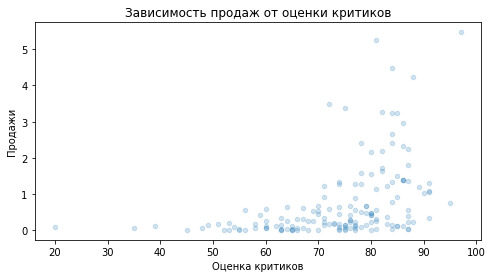

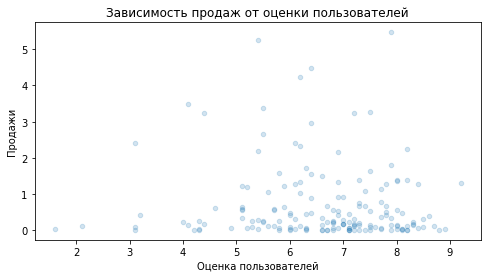

,total_sales,user_score,critic_score
total_sales,1.000000,-0.070384,0.428677
user_score,-0.070384,1.000000,0.440977
critic_score,0.428677,0.440977,1.000000


In [ ]:
# исследую зависимость отзывов пользователей и критиков на продажи для Xone
Xone_data = good_data[good_data['platform'] == 'XOne']

plot = Xone_data.plot(x='critic_score', y='total_sales', kind='scatter',alpha = 0.2,figsize=(8,4))
plot.set_xlabel('Оценка критиков')
plot.set_ylabel('Продажи')
plot.set_title('Зависимость продаж от оценки критиков')
plt.show()

print('\n')
# теперь для отзывов пользователей
plot = Xone_data.plot(x='user_score', y='total_sales', kind='scatter',alpha = 0.2,figsize=(8,4))
plot.set_xlabel('Оценка пользователей')
plot.set_ylabel('Продажи')
plot.set_title('Зависимость продаж от оценки пользователей')
plt.show() 

Xone_data[['total_sales','user_score','critic_score']].corr()


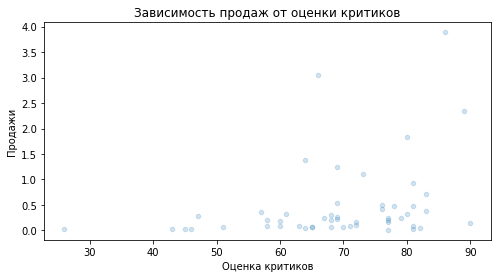

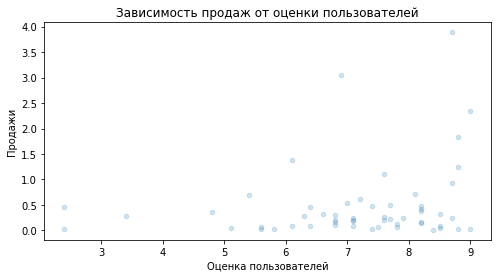

,total_sales,user_score,critic_score
total_sales,1.000000,0.215193,0.314117
user_score,0.215193,1.000000,0.862485
critic_score,0.314117,0.862485,1.000000


In [ ]:
# исследую зависимость отзывов пользователей и критиков на продажи для 3DS
three_ds_data = good_data[good_data['platform'] == '3DS']

plot = three_ds_data.plot(x='critic_score', y='total_sales', kind='scatter',alpha = 0.2,figsize=(8,4))
plot.set_xlabel('Оценка критиков')
plot.set_ylabel('Продажи')
plot.set_title('Зависимость продаж от оценки критиков')
plt.show()

print('\n')
# теперь для отзывов пользователей
plot = three_ds_data.plot(x='user_score', y='total_sales', kind='scatter',alpha = 0.2,figsize=(8,4))
plot.set_xlabel('Оценка пользователей')
plot.set_ylabel('Продажи')
plot.set_title('Зависимость продаж от оценки пользователей')
plt.show() 

three_ds_data[['total_sales','user_score','critic_score']].corr()

Продажи игр на других платформах так же показывают небольшую взаимосвязь оценки критиков и продаж,но меньшую. Пользовательские оценки по большей части распределены хаотично,но,например, на 3DS проявляется небольшая корреляция продаж от пользовательских оценок.

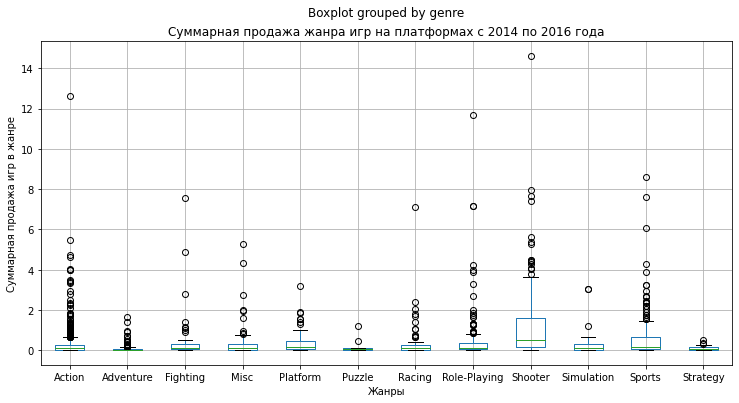

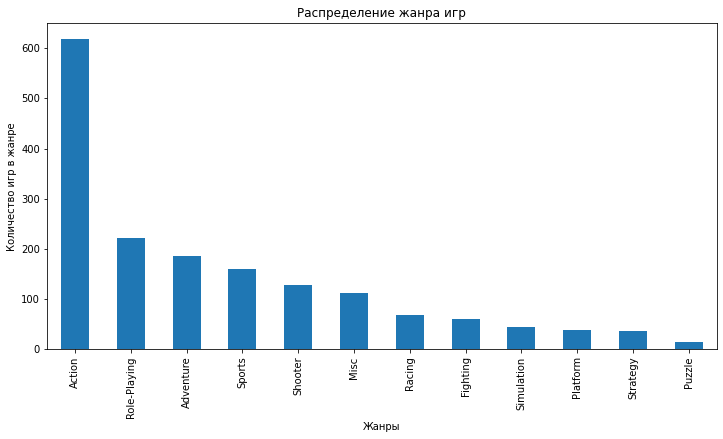

In [ ]:
# построю общее распределение игр по жанрам
plot = good_data[['genre','total_sales']].boxplot( by = 'genre',figsize=(12,6));
plot.set_xlabel('Жанры')
plot.set_ylabel('Суммарная продажа игр в жанре')
plot.set_title('Суммарная продажа жанра игр на платформах с 2014 по 2016 года')
plt.show();

plot = good_data.groupby('genre').count().sort_values(
    by = 'name',
    ascending = False)['name'].plot(
    x='genre',
    kind='bar',
    figsize=(12,6))

plot.set_xlabel('Жанры')
plot.set_ylabel('Количество игр в жанре')
plot.set_title('Распределение жанра игр')
plt.show();

Самые продаваемые жанры: Action,Shooter,RPG,Sports. Меньше всего продаются пазлы и стратегии. Можно явно выделить популярные и нишевые жанры.

# IV. Портрет пользователя каждого региона
<a name="4zag"></a>

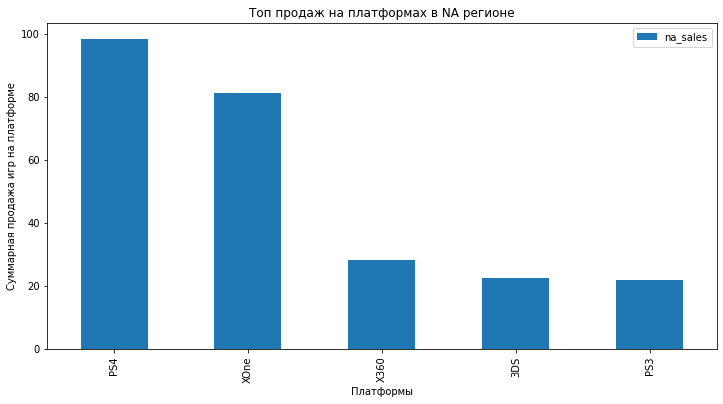

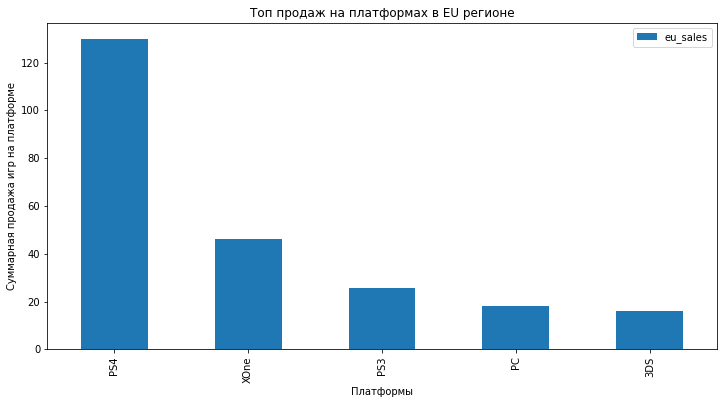

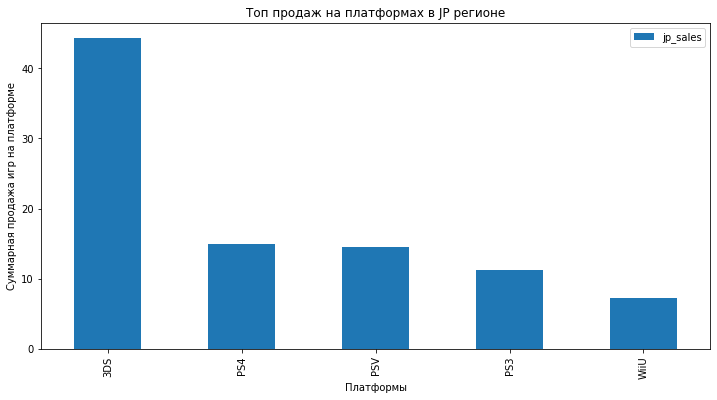

In [ ]:
# самые популярные платформы в регионах:
# na
plot = good_data.pivot_table(index = 'platform',values = 'na_sales',aggfunc=('sum')).sort_values(
    by='na_sales',ascending = False).head().plot(kind = 'bar',figsize = (12,6))
plot.set_xlabel('Платформы')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Топ продаж на платформах в NA регионе')
plt.show();
print('\n')
#eu
plot = good_data.pivot_table(index = 'platform',values = 'eu_sales',aggfunc=('sum')).sort_values(
    by='eu_sales',ascending = False).head().plot(kind = 'bar',figsize = (12,6))
plot.set_xlabel('Платформы')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Топ продаж на платформах в EU регионе')
plt.show();
print('\n')
#jp
plot = good_data.pivot_table(index = 'platform',values = 'jp_sales',aggfunc=('sum')).sort_values(
    by='jp_sales',ascending = False).head().plot(kind = 'bar',figsize = (12,6))   
plot.set_xlabel('Платформы')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Топ продаж на платформах в JP регионе')
plt.show(); 

В европе и северной америке предпочитают playstation и Xbox. Причем playstation безоговорочный лидер в продажах и в европе,и в северной америке. Xbox в северной америке лишь немного уступает в продажах от ps4,а в европе уступает ps4 более чем в 2 раза. В японском регионе 3DS от нинтендо очень популярна,следом идут консоли playstation,но их продажи не сравнимы с продажами в европе и северной америке.

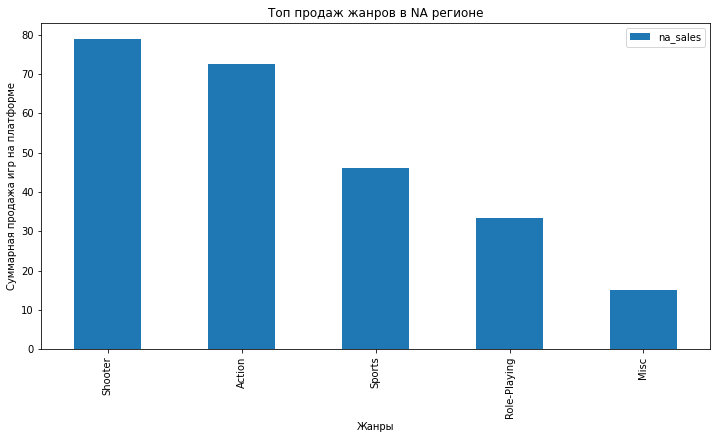

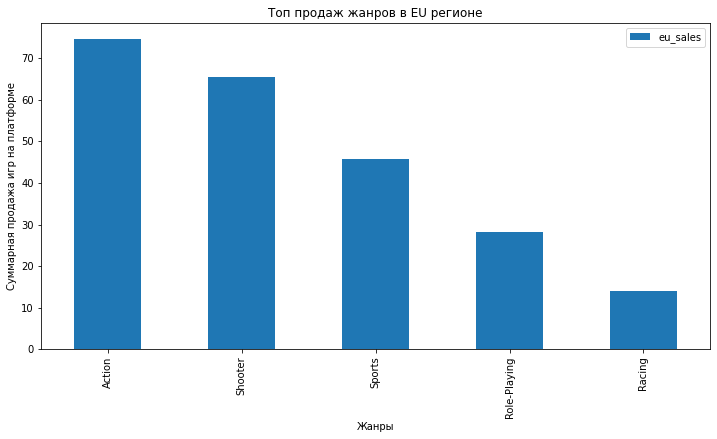

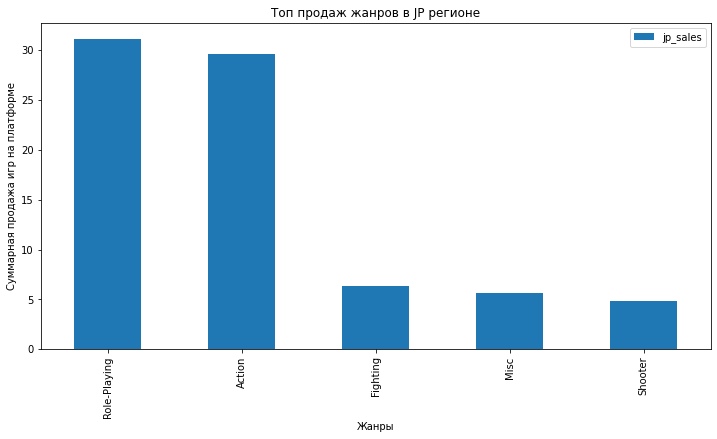

In [ ]:
# самые популярные жанры в регионах:
#na
plot = good_data.pivot_table(index = 'genre',values = 'na_sales',aggfunc=('sum')).sort_values(
    by='na_sales',ascending = False).head().plot(kind = 'bar',figsize = (12,6))
plot.set_xlabel('Жанры')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Топ продаж жанров в NA регионе')
plt.show();
print('\n')
#eu
plot = good_data.pivot_table(index = 'genre',values = 'eu_sales',aggfunc=('sum')).sort_values(
    by='eu_sales',ascending = False).head().plot(kind = 'bar',figsize = (12,6))
plot.set_xlabel('Жанры')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Топ продаж жанров в EU регионе')
plt.show();
print('\n')
#jp
plot = good_data.pivot_table(index = 'genre',values = 'jp_sales',aggfunc=('sum')).sort_values(
    by='jp_sales',ascending = False).head().plot(kind = 'bar',figsize = (12,6))   
plot.set_xlabel('Жанры')
plot.set_ylabel('Суммарная продажа игр на платформе')
plot.set_title('Топ продаж жанров в JP регионе')
plt.show(); 

Рынок северной америки и европы крайне схож - по убыванию популярности: шутеры,экшн,спорт,рпг. Эти рынки отличаются тем,что в европе более популярен жанр гонок,а в северной америке игры смешанного жанра. Менталитет этих регионов схож,поэтому получаем почти одинаковые итоге. Япония же - совсем другой рынок,там на первом месте рпг,экшн,файтинги и игры смешанного жанра и шутеры. Это связано с особенностью менталитета. 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
rating,,,,,,,,
E,441285,50.74,58.06,8.94,15.39,10276.0,1141.0,133.13
E10+,372741,33.23,26.16,4.46,7.83,8438.0,1001.7,71.68
M,533937,96.42,93.44,8.01,28.67,16435.0,1747.3,226.54
T,546072,38.95,34.07,14.78,11.33,14726.0,1737.9,99.13
no_rating,1509221,64.72,58.95,56.90,18.40,2041.0,253.8,198.97


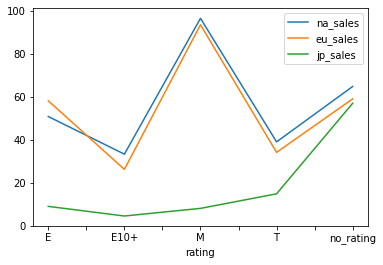

In [ ]:
#влияет ли рейтинг ESRB на продажи

display(good_data.groupby('rating').sum())

good_data.groupby('rating').sum().plot( y=['na_sales','eu_sales','jp_sales']);

Рынки европы и северной америки показывают почти идентичное распределение продаж по категориям. Рынок японии так же похож на европейский и рынок северной америки в категориях E и E10. Игры категории M в европе и северной америке - самые продаваемые,в то время как в японии эта категория лишь на 3 месте. Игры без рейтинга занимают в каждом регионе почти 60 миллионов,что очень много,особенно для рынка японии,где все игры с рейтингом суммарно продались меньше. Для японского рынка это самая крупная категория. 

# V. Проверка гипотез
<a name="5zag"></a>

In [ ]:
# Гипотеза0 : средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
# Гипотеза1 : средние пользовательские рейтинги платформ Xbox One и PC !=

#xbox
xbox_data = good_data[good_data['platform'] == 'XOne']['user_score']
xbox_data = xbox_data.dropna()
# pc
pc_data = good_data[good_data['platform'] == 'PC']['user_score']
pc_data = pc_data.dropna()

alpha = 0.05

hipotez_rez = stats.ttest_ind(
   xbox_data, 
   pc_data,
    equal_var = False)

print('p-значение:', hipotez_rez.pvalue)
if hipotez_rez.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print(f'Разница в выборочных средних в %: {round(100*(1 - pc_data.mean()/xbox_data.mean()),2)}')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу
Разница в выборочных средних в %: 4.49


Нельзя отвергнуть нулевую гипотезу. Следовательно не удалось показать неравенство рейтингов платформ Xbox One и PC.

In [ ]:
# Средние пользовательские рейтинги жанров Action и Sports разные
# Гипотеза0 : Средние пользовательские рейтинги жанров Action и Sports равные.
# Гипотеза1 : Средние пользовательские рейтинги жанров Action и Sports !=.

#action
action_data = good_data[good_data['genre'] == 'Action']['user_score']
action_data = action_data.dropna()
#sports
sports_data = good_data[good_data['genre'] == 'Sports']['user_score']
sports_data = sports_data.dropna()

alpha = 0.05

hipotez_rez = stats.ttest_ind(
   action_data, 
   sports_data,
    equal_var = False)

print('p-значение:', hipotez_rez.pvalue)
if hipotez_rez.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print(f'Разница в выборочных средних в %: {round(100*(1 - sports_data.mean()/action_data.mean()),2)}')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу
Разница в выборочных средних в %: 22.71


По результатам я отвергаю нулевую гипотезу,что говорит о том,что средние пользовательские оценки жанров Экшн и спорт действительно разнятся.

# VI. Вывод
<a name="6zag"></a>
В ходе работы был определен средний цикл жизни платформы,который составил 7 лет. Поэтому стоить обращать внимание на платформы,которые находятся в начале или середине жизненного цикла. Замечена небольшая корреляция между оценкой критиков и продажей игры, поэтому стоит обратить внимание на игры с высокими оценками от критиков. Составлены портерты пользователей в каждом из регионов,где на японский рынок стоит бросить усилия на японские консоли nintendo и sony,а так же игры в жанре РПГ,Экшн и файтинги,а самые высокие продажи с рейтингом ESRB T,но так же стоит учесть,что игры без рейтинга от ESRB продаются больше всего в японии,что,скорее всего, связано с тем,что в японии рейтинг выставляет другая компания - CERO [https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization]. На североамериканском и европейском рынке самые прибыльные платформы - ps4 и Xbox,а жанры игр - Шутеры,Экшн и спорт, а рейтинг ESRB M.